In [ ]:
#Bias in AI and Fairness
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample biased dataset representing hiring decisions
data = {
    'Experience': [1, 3, 5, 7, 9, 2, 4, 6, 8, 10],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Hired': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Encoding categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Split data
X = df[['Experience', 'Gender']]
y = df['Hired']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, predictions))
# Reviewing model accuracy by groups can reveal potential biases that require correction.

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [ ]:
#Privacy and Data Security
!pip install faker
import pandas as pd
from faker import Faker

# Creating a dataset with sensitive information
fake = Faker()
data = {
    'Name': [fake.name() for _ in range(5)],
    'SSN': [fake.ssn() for _ in range(5)],
    'Phone': [fake.phone_number() for _ in range(5)]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Anonymizing sensitive columns
df['SSN'] = df['SSN'].apply(lambda x: 'XXX-XX-' + x[-4:])
df['Name'] = 'Anonymous'
print("Anonymized Data:\n", df)
#Anonymizing data - Read about differential privacy.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.0 MB/s eta 0:00:00
Original Data:
               Name          SSN                Phone
0  Danielle Wilson  596-88-4584    (764)282-2106x005
1   Angelica Smith  735-45-6198         901-466-6792
2   Autumn Simmons  246-34-9783         422-840-0914
3   Jerome Vasquez  116-76-4476  +1-772-217-1187x554
4    Nicholas Lutz  367-73-4201         676.910.8107
Anonymized Data:
         Name          SSN                Phone
0  Anonymous  XXX-XX-4584    (764)282-2106x005
1  Anonymous  XXX-XX-6198         901-466-6792
2  Anonymous  XXX-XX-9783         422-840-0914
3  Anonymous  XXX-XX-4476  +1-772-217-1187x554
4  Anonymous  XXX-XX-4201         676.910.8107


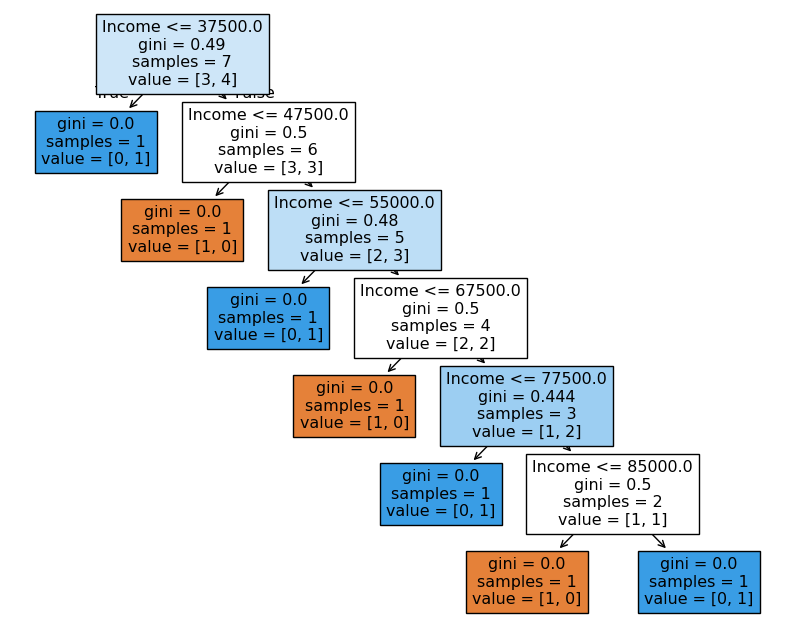

In [ ]:
#Transparency and Explainability
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Sample dataset representing loan approvals
data = {
    'Income': [30000, 45000, 50000, 60000, 75000, 80000, 90000],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'LoanApproved': [1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
# Using our earlier dataset without the Gender column
X = df[['Income']]
y = df['LoanApproved']

# Train a Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Plotting the tree for interpretability
plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()
